# Problem 1:

<b>You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx
</b>

<b>Data Ingestion: 12 marks
1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. (5 Marks)
2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Data Preparation: 5 marks
1. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)

Modelling: 26 marks
1. Apply Logistic Regression and LDA (linear discriminant analysis). (5 marks)
2. Apply KNN Model, Naïve Bayes Model and support vector machine (SVM) model. Interpret the results. (7 marks)
3. Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. (7 marks)
4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


Inference: 5 marks
1. Based on these predictions, what are the insights? (5 marks)
</b>

<b>**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.

# Data Ingestion

<b>
1.Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it.

2.Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [227]:
Dictionary1=pd.read_excel("Election_Data.xlsx")

In [228]:
Dictionary1

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


In [229]:
df_elec=pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes").drop(['Unnamed: 0'],axis=1)

In [230]:
df_elec.head(1)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female


# Shape

In [231]:
df_elec.shape

(1525, 9)

# Data Information

In [232]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


<b> Object Types Columns:
    
vote                       
gender   
</b>

# Checking Null Values

In [233]:
df_elec.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

 <b> There are no null values in the dataset

# Checking Duplicates 

In [234]:
df_elec.duplicated().sum()

8

In [235]:
df_elec[df_elec.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [236]:
#Before dropping duplicates
df_elec.shape

(1525, 9)

In [237]:
df_elec=df_elec.drop_duplicates(keep='first')

In [238]:
df_elec.shape

(1517, 9)

<b>8 duplicates has been dropped from dataset</b>

# 5 point summary

In [239]:
df_elec.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


# Renaming Column names

In [240]:
#Original Column names
df_elec.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [241]:
#Chnaged Column names
df_elec.columns = ['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'] 

In [242]:
df_elec.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

In [243]:
df_elec.shape

(1517, 9)

# Checking Unique values for individul columns

In [244]:
for i in df_elec.columns:
    print(df_elec[i].value_counts(),'\n')

Labour          1057
Conservative     460
Name: vote, dtype: int64 

37    42
49    39
47    38
35    38
46    37
      ..
87     3
92     2
91     1
90     1
93     1
Name: age, Length: 70, dtype: int64 

3    604
4    538
2    256
5     82
1     37
Name: economic_cond_national, dtype: int64 

3    645
4    435
2    280
5     92
1     65
Name: economic_cond_household, dtype: int64 

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64 

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64 

11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64 

2    776
0    454
3    249
1     38
Name: political_knowledge, dtype: int64 

female    808
male      709
Name: gender, dtype: int64 



# Class Information from Dataset

In [245]:
df_elec.vote.value_counts(normalize=True)*100

Labour          69.676994
Conservative    30.323006
Name: vote, dtype: float64

<b> Class Labour has 69.67 percentage and Conservative has 30.32 percentage

# Univariate Analysis

In [246]:
df_elec.columns

Index(['vote', 'age', 'economic_cond_national', 'economic_cond_household',
       'Blair', 'Hague', 'Europe', 'political_knowledge', 'gender'],
      dtype='object')

In [247]:
cat=[]
num=[]
for i in df_elec.columns:
    if df_elec[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print('Categorical Variables:',cat) 
print('Numeric Variables:',num)

Categorical Variables: ['vote', 'gender']
Numeric Variables: ['age', 'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Europe', 'political_knowledge']


<b>By checking the unique values of the data,Age is continuous and rest all variables are categorical
    
    Age: Numerical and continuous variable

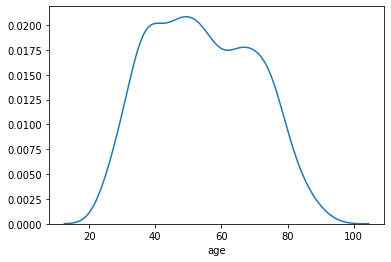

In [248]:
#Age variable distribution
sns.distplot(df_elec['age'],hist=False)

# Numeric Variables Distribution

Text(0.5, 1.0, 'political_knowledge')

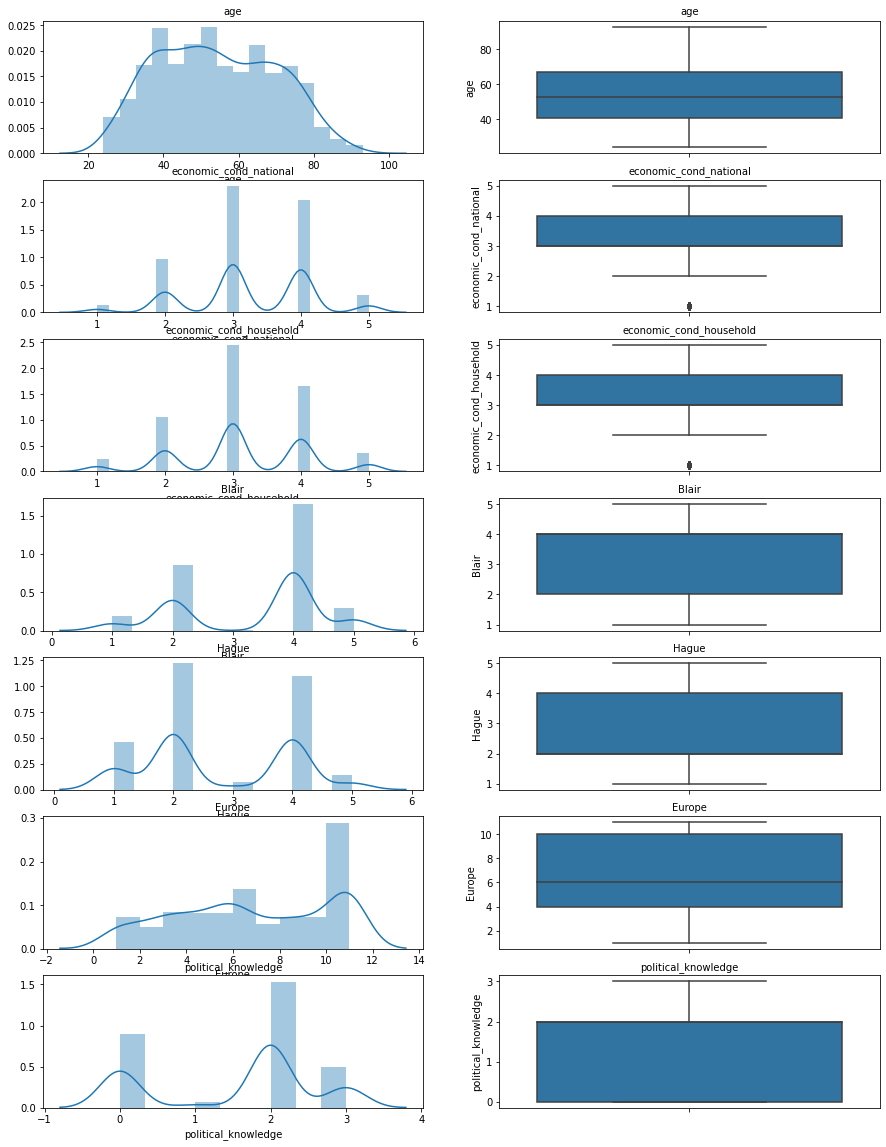

In [249]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(15,20)
a = sns.distplot(df_elec['age'] , ax=axes[0][0])
a.set_title("age",fontsize=10)

a = sns.boxplot(df_elec['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age",fontsize=10)

a = sns.distplot(df_elec['economic_cond_national'] , ax=axes[1][0])
a.set_title("economic_cond_national",fontsize=10)

a = sns.boxplot(df_elec['economic_cond_national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic_cond_national",fontsize=10)

a = sns.distplot(df_elec['economic_cond_household'] , ax=axes[2][0])
a.set_title("economic_cond_household",fontsize=10)

a = sns.boxplot(df_elec['economic_cond_household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic_cond_household",fontsize=10)

a = sns.distplot(df_elec['Blair'] , ax=axes[3][0])
a.set_title("Blair",fontsize=10)

a = sns.boxplot(df_elec['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair",fontsize=10)

a = sns.distplot(df_elec['Hague'] , ax=axes[4][0])
a.set_title("Hague",fontsize=10)

a = sns.boxplot(df_elec['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague",fontsize=10)


a = sns.distplot(df_elec['Europe'] , ax=axes[5][0])
a.set_title("Europe",fontsize=10)

a = sns.boxplot(df_elec['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe",fontsize=10)

a = sns.distplot(df_elec['political_knowledge'] , ax=axes[6][0])
a.set_title("political_knowledge",fontsize=10)

a = sns.boxplot(df_elec['political_knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political_knowledge",fontsize=10)

# Multivariate Analysis and Pair Plot

# Strip Plot for Independent and Dependent variables

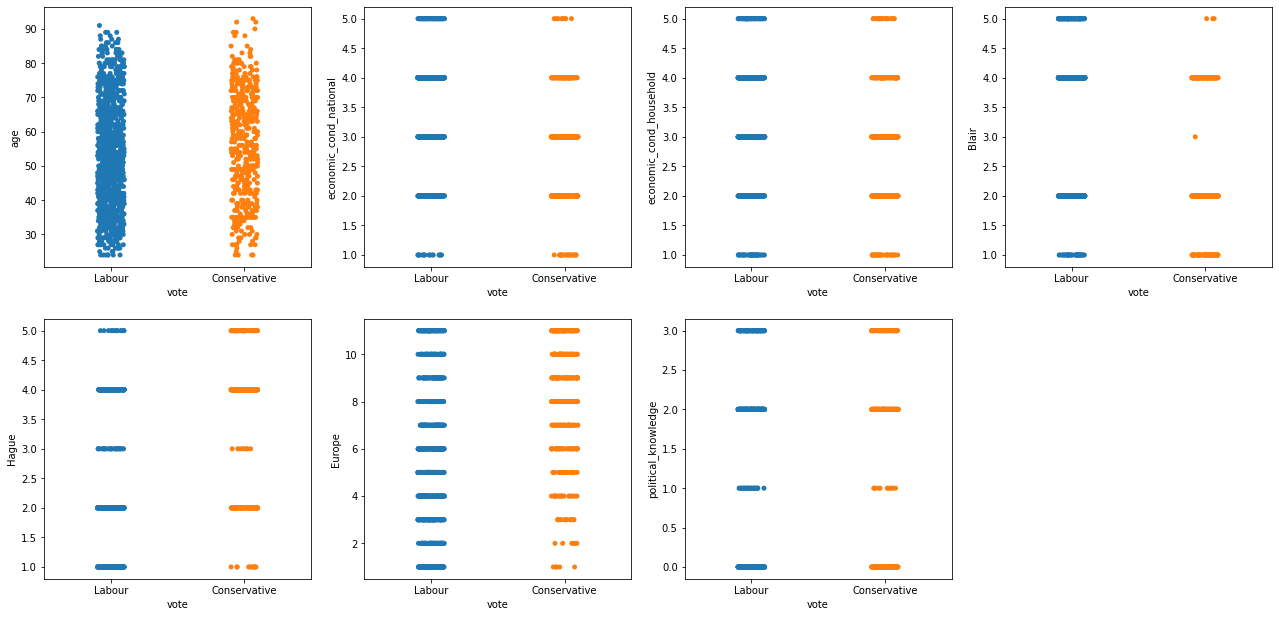

In [250]:
col=df_elec.columns[df_elec.dtypes!='object']
fig=plt.figure(figsize=(22,22))
for i in range(0,len(col)):
    ax=fig.add_subplot(4,4,i+1)
    sns.stripplot(df_elec.vote,df_elec[col[i]],jitter=True)
    #print(df_elec[col[0]])


<b> From Strip Plot we can interpret

1.Age is continuous and distributed similary for both parties


2.Assessment of the Labour leader with rating 3 is not there for Labour Party and for Conservative party data sample is very less

3.From Europe to Vote data distribution , we can say Conservation Party few voters have less Eurosceptic sentimets


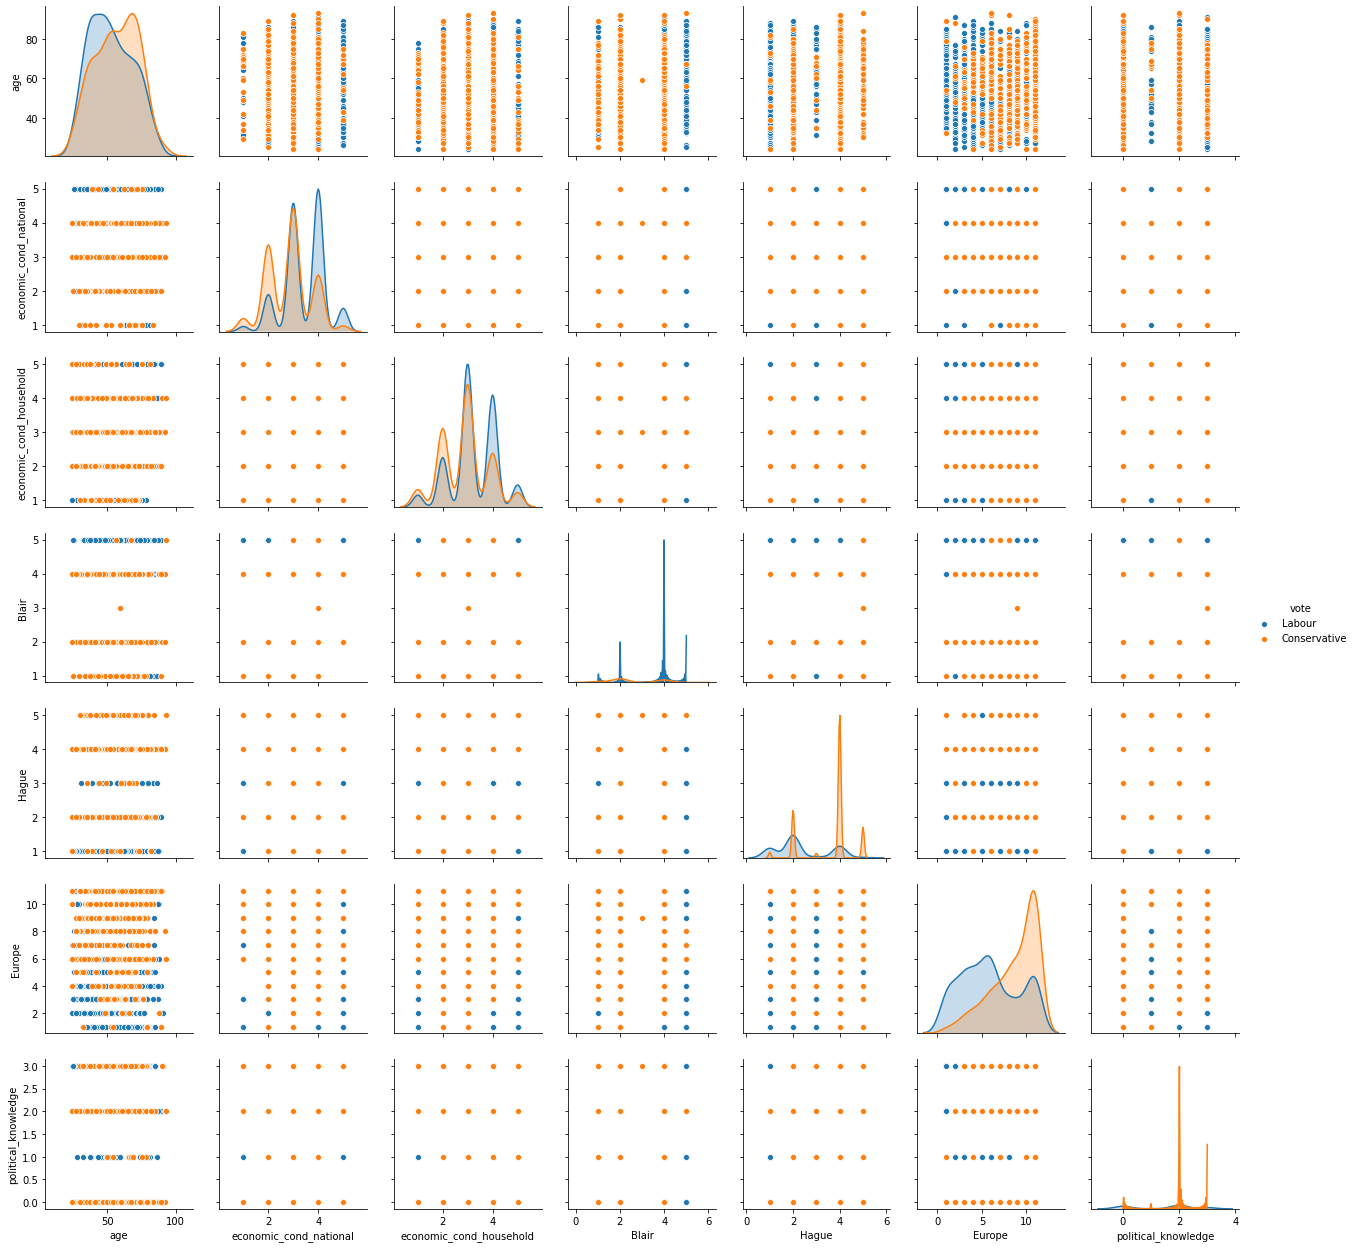

In [251]:
sns.pairplot(df_elec,hue='vote' , diag_kind = 'kde')

# Correlation

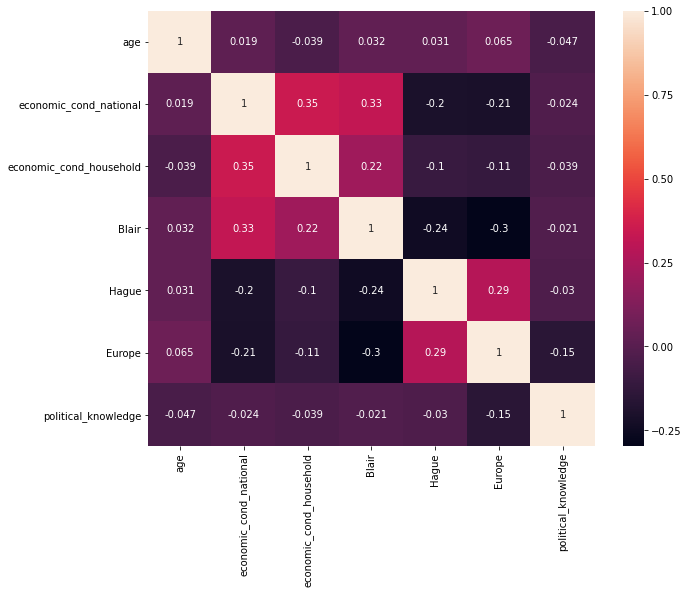

In [252]:
plt.figure(figsize=(10,8))
sns.heatmap(df_elec.corr(),annot=True)

# Outlier check

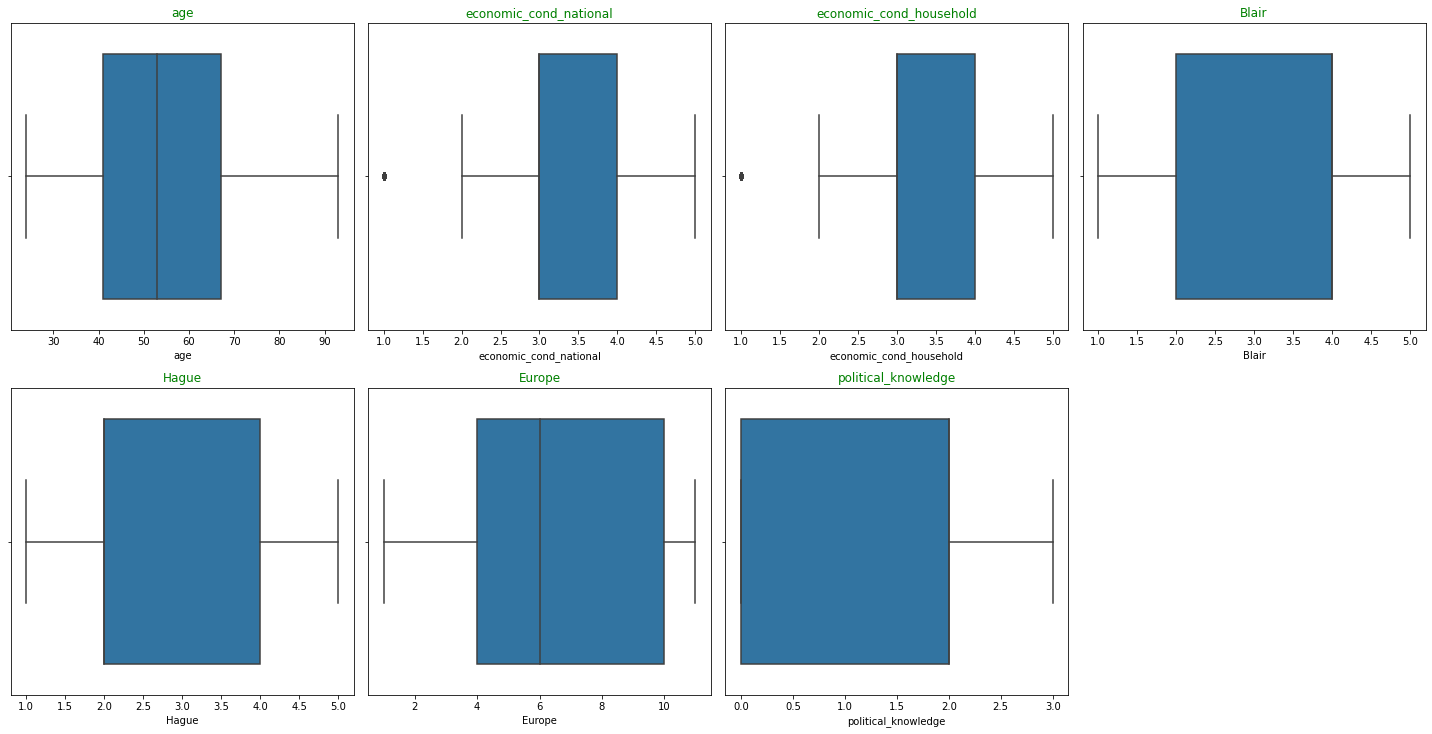

In [253]:
col=df_elec.columns[df_elec.dtypes!='object']
data_plot=df_elec[col]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Green')
plt.tight_layout()
plt.show()

<b> There is no Outlier in Age variable

# Encoding of the variables

In [254]:
df_elec =pd.get_dummies(df_elec,columns=['vote','gender'],drop_first=True)

In [255]:
df_elec.head(1)

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0


<b> Unique Values after scaling

In [256]:
for i in df_elec.columns:
    print(df_elec[i].value_counts(),'\n')

37    42
49    39
47    38
35    38
46    37
      ..
87     3
92     2
91     1
90     1
93     1
Name: age, Length: 70, dtype: int64 

3    604
4    538
2    256
5     82
1     37
Name: economic_cond_national, dtype: int64 

3    645
4    435
2    280
5     92
1     65
Name: economic_cond_household, dtype: int64 

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64 

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64 

11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64 

2    776
0    454
3    249
1     38
Name: political_knowledge, dtype: int64 

1    1057
0     460
Name: vote_Labour, dtype: int64 

0    808
1    709
Name: gender_male, dtype: int64 



# Scaling

In [257]:
df_elec.describe()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote_Labour,gender_male
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541,0.696770,0.467370
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417,0.459805,0.499099
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,1.000000,0.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,1.000000,1.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,1.000000,1.000000


In [258]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [259]:
df_elec_scaled=df_elec

In [260]:
df_elec_scaled.shape

(1517, 9)

In [261]:
df_elec_scaled.head(1)

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0


In [262]:
df_elec_scaled['age'] = std_scale.fit_transform(df_elec_scaled[['age']])

In [263]:
df_elec_scaled.describe()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote_Labour,gender_male
count,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.917458e-17,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541,0.696770,0.467370
std,1.000330e+00,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417,0.459805,0.499099
min,-1.926617e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,-8.435773e-01,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000
50%,-7.907881e-02,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,1.000000,0.000000
75%,8.128361e-01,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,1.000000,1.000000
max,2.469250e+00,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,1.000000,1.000000


<b>Scaling is done for only Age variable. With or without scaling model is giving same results. Verified for Logistic Regression model

# Train Test Sample

In [264]:
df_elec.columns

Index(['age', 'economic_cond_national', 'economic_cond_household', 'Blair',
       'Hague', 'Europe', 'political_knowledge', 'vote_Labour', 'gender_male'],
      dtype='object')

In [265]:
# Copy all the predictor variables into X dataframe
X = df_elec.drop('vote_Labour', axis=1)

# Copy target into the y dataframe.  
y = df_elec['vote_Labour']

In [266]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [267]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1061, 8)
(456, 8)
(1061,)
(456,)


# MODEL BUILDING  - Normal and Hyperparmeter models

# Apply Logistic Regression and LDA (Linear Discriminant Analysis)

In [268]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

# Logistic Regression

<b>BASIC MODEL

In [269]:
from sklearn.linear_model import LogisticRegression
LR =LogisticRegression(random_state=1)
LR.fit(X_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [270]:
## Performance Matrix on train data set
y_train_predict = LR.predict(X_train)
model_score = LR.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8360037700282752
[[197 110]
 [ 64 690]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



# AUC and ROC for the training data

AUC: 0.890


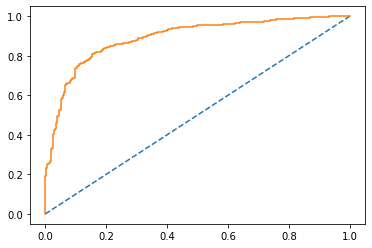

In [271]:
# predict probabilities
probs = LR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [272]:
## Performance Matrix on test data set
y_test_predict = LR.predict(X_test)
model_score = LR.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[110  43]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



# AUC and ROC for the test data

AUC: 0.890


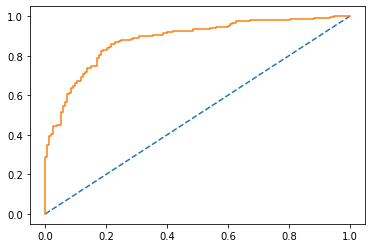

In [273]:
# predict probabilities
probs = LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<b>SCALED Normal MODEL

In [274]:
# Copy all the predictor variables into X dataframe
X = df_elec_scaled.drop('vote_Labour', axis=1)

# Copy target into the y dataframe.  
y = df_elec_scaled['vote_Labour']

In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [276]:
from sklearn.linear_model import LogisticRegression
LR =LogisticRegression(random_state=1)
LR.fit(X_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [277]:
## Performance Matrix on train data set
y_train_predict = LR.predict(X_train)
model_score = LR.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8360037700282752
[[197 110]
 [ 64 690]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



# AUC and ROC for the training data

AUC: 0.890


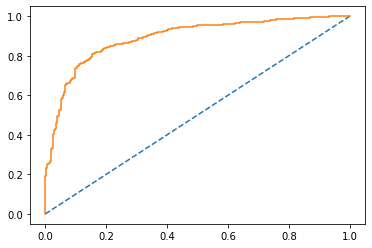

In [278]:
# predict probabilities
probs = LR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [279]:
## Performance Matrix on test data set
y_test_predict = LR.predict(X_test)
model_score = LR.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[110  43]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



# AUC and ROC for the test data

AUC: 0.890


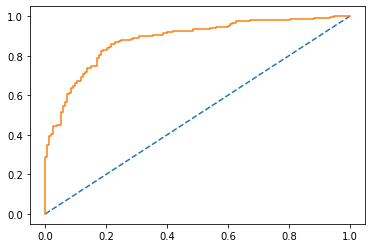

In [280]:
# predict probabilities
probs = LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<b> TUNED Logistics Regression

In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

model = LogisticRegression(random_state=1,max_iter=10000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01,4,10,50,200]
tol=[0.0001,0.000001,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,tol=tol)
LR = GridSearchCV(estimator=model, param_grid=grid,cv=8, verbose=0,n_jobs=2)
LR.fit(X_train, y_train)

GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=2,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 4, 10, 50, 200],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None

In [282]:
## Performance Matrix on train data set
y_train_predict = LR.predict(X_train)
model_score = LR.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8369462770970783
[[197 110]
 [ 63 691]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



# AUC and ROC for the training data

AUC: 0.890


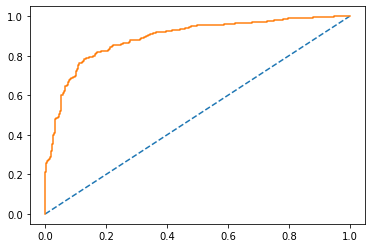

In [283]:
# predict probabilities
probs = LR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [284]:
## Performance Matrix on test data set
y_test_predict = LR.predict(X_test)
model_score = LR.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[107  46]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



# AUC and ROC for the test data

AUC: 0.890


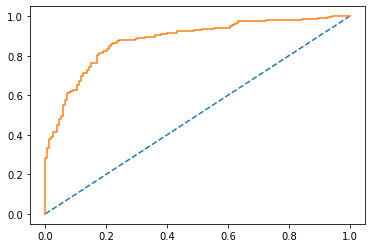

In [285]:
# predict probabilities
probs = LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# LDA

<b> Normal Model

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [62]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



# AUC and ROC for the training data

AUC: 0.889


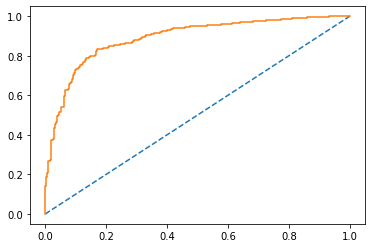

In [63]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [64]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



# AUC and ROC for the test data

AUC: 0.889


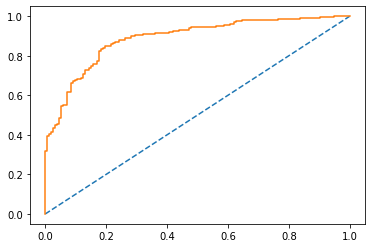

In [65]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<b>Tuned Model LDA

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

model = LinearDiscriminantAnalysis()
solvers = ['svd', 'lsqr', 'eigen']
tol=[0.0001,0.000001,0.001]
# define grid search
grid = dict(solver=solvers,tol=tol)
LDA_model = GridSearchCV(estimator=model, param_grid=grid,cv=6,verbose=0,n_jobs=5)
LDA_model.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='warn', n_jobs=5,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-06, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [67]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



# AUC and ROC for the training data

AUC: 0.889


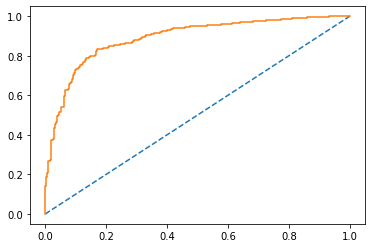

In [68]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [69]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



# AUC and ROC for the test data

AUC: 0.889


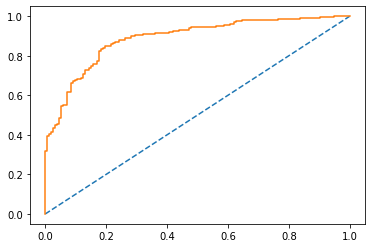

In [70]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Apply KNN Model, Naïve Bayes Model and Support Vector Machine (SVM) model.

# KNN Model

<b> Normal Model

In [71]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8614514608859567
[[223  84]
 [ 63 691]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



# AUC and ROC for the training data

AUC: 0.930


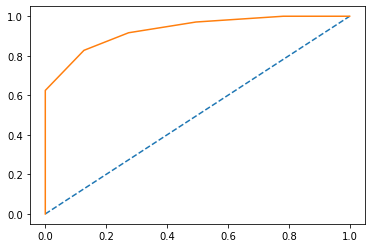

In [73]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [74]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[102  51]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



# AUC and ROC for the test data

AUC: 0.930


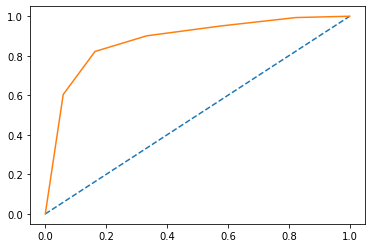

In [75]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<b> Tuned Model

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier()
grid = {
'n_neighbors':[2,3,4,7,10],
'leaf_size':[10,20,30,40,50],
'weights':['uniform','distance'],
'metric':['minkowski','euclidean','manhattan'],
'algorithm':['auto', 'kd_tree']
}

KNN_model = GridSearchCV(estimator=model, param_grid=grid,cv=10, verbose=1,n_jobs=2)
KNN_model.fit(X_train,y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 265 tasks      | elapsed:    8.1s
[Parallel(n_jobs=2)]: Done 2365 tasks      | elapsed:   34.3s
[Parallel(n_jobs=2)]: Done 3000 out of 3000 | elapsed:   42.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=2,
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 7, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [77]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8520263901979265
[[224  83]
 [ 74 680]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       307
           1       0.89      0.90      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061



AUC: 0.916


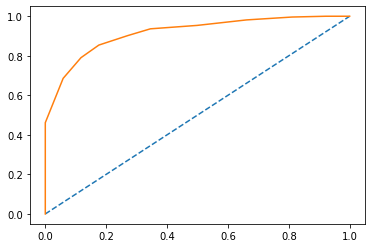

In [78]:
#AUC and ROC for the training data

# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [80]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[112  41]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.916


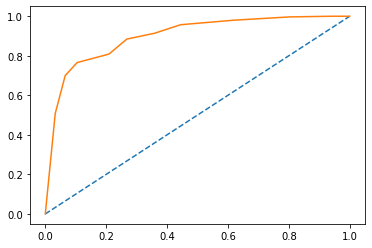

In [81]:
#AUC and ROC for the test data

# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Naïve Bayes Model 

<b>Normal Model

In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [83]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



# AUC and ROC for the training data

AUC: 0.888


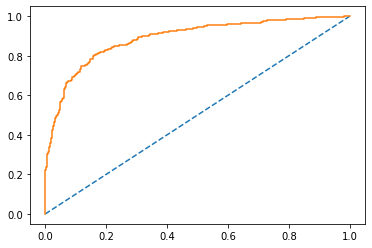

In [84]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [85]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



# AUC and ROC for the test data

AUC: 0.888


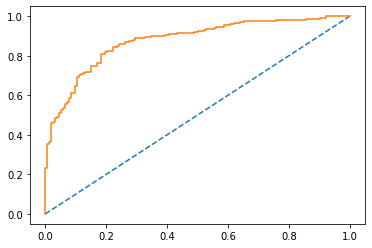

In [86]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<b> TUNED BAYES MODEL

In [87]:
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

grid={'var_smoothing':[1e-8, 1e-7, 1e-6, 1e-5, 1e-4,1e-3,1e-2,1e-1]}
model = GaussianNB()
NB_model = GridSearchCV(estimator = model, param_grid = grid, cv =3,return_train_score=True)
NB_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None,
             param_grid={'var_smoothing': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                                           0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [89]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8388312912346843
[[209  98]
 [ 73 681]]
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       307
           1       0.87      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [90]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8388312912346843
[[209  98]
 [ 73 681]]
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       307
           1       0.87      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



AUC: 0.888


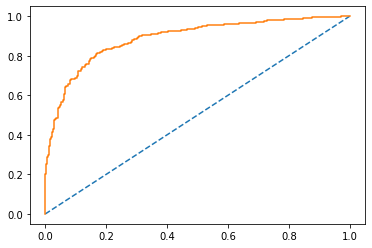

In [91]:
#AUC and ROC for the training data

# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [92]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[112  41]
 [ 38 265]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       153
           1       0.87      0.87      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.888


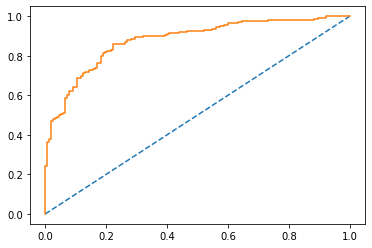

In [93]:
#AUC and ROC for the test data

# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# SVM

<b>Normal Model

In [94]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1,probability=True,gamma='auto')
SVM_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [95]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8737040527803959
[[221  86]
 [ 48 706]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       307
           1       0.89      0.94      0.91       754

    accuracy                           0.87      1061
   macro avg       0.86      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061



AUC: 0.928


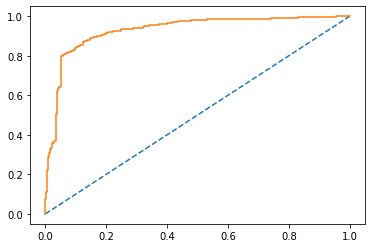

In [96]:
#AUC and ROC for the training data

# predict probabilities
probs = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [97]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[100  53]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.928


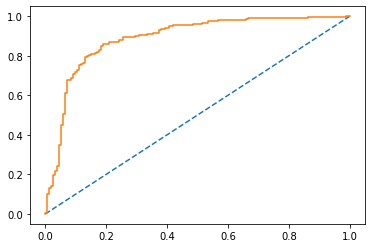

In [98]:
#AUC and ROC for the test data

# predict probabilities
probs = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<B>TUNED MODEL

In [161]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

grid = {'C': [0.1,1],'gamma': [1,0.1,1e-3, 1e-4],'kernel': ['rbf']}

model = svm.SVC(random_state=1,probability=True)
SVM_model = GridSearchCV(estimator = model, param_grid = grid, cv =10)
SVM_model.fit(X_train, y_train)	

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [162]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8689915174363808
[[217  90]
 [ 49 705]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       307
           1       0.89      0.94      0.91       754

    accuracy                           0.87      1061
   macro avg       0.85      0.82      0.83      1061
weighted avg       0.87      0.87      0.87      1061



AUC: 0.922


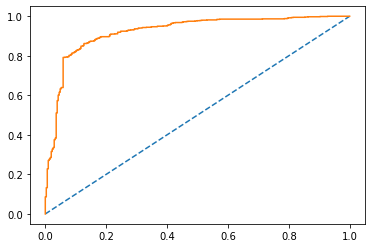

In [163]:
#AUC and ROC for the training data

# predict probabilities
probs = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [164]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[101  52]
 [ 23 280]]
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       153
           1       0.84      0.92      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.79      0.81       456
weighted avg       0.83      0.84      0.83       456



AUC: 0.922


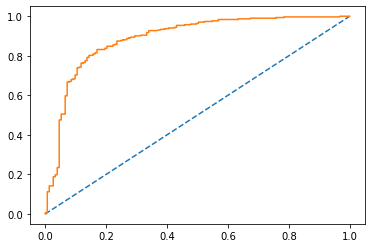

In [165]:
#AUC and ROC for the test data

# predict probabilities
probs = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

#  Boosting and Bagging 

# Ada Boosting

<b>Normal Model

In [100]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

In [174]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



# AUC and ROC for the training data

AUC: 0.915


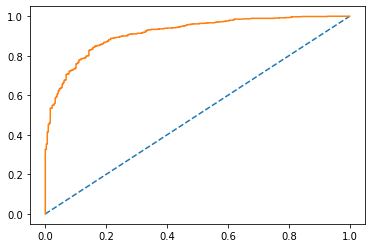

In [205]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [175]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



# AUC and ROC for the test data

AUC: 0.915


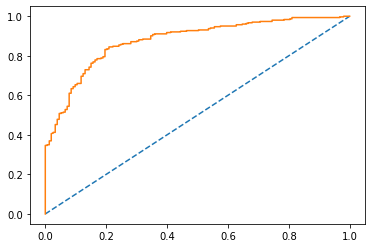

In [206]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<b>Tuned Model

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,200,300,400]
}

model = AdaBoostClassifier(random_state=1)
ADB_model = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10)
ADB_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=1),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [50, 100, 200, 300, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [110]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8463713477851084
[[210  97]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



AUC: 0.912


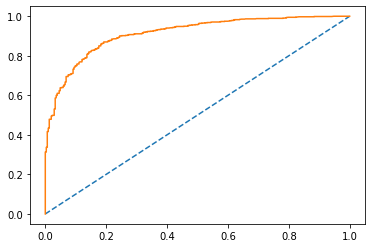

In [111]:
#AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [112]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[105  48]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       153
           1       0.85      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



AUC: 0.912


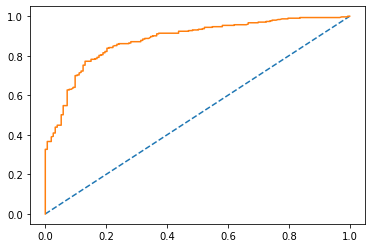

In [113]:
#AUC and ROC for the test data

# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# XG Boosting

In [114]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [115]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8416588124410933
[[210  97]
 [ 71 683]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       307
           1       0.88      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



# AUC and ROC for the training data

AUC: 0.899


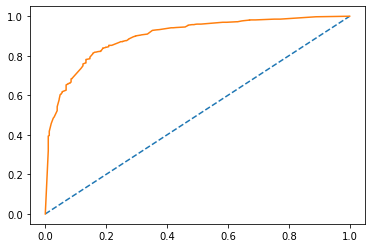

In [116]:
# predict probabilities
probs = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [117]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8377192982456141
[[104  49]
 [ 25 278]]
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       153
           1       0.85      0.92      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.83       456



# AUC and ROC for the test data

AUC: 0.899


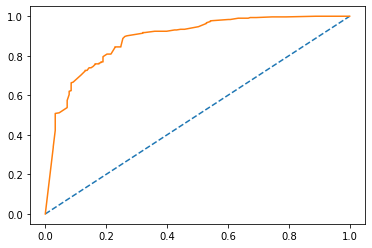

In [118]:
# predict probabilities
probs = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<b>TUNED MODEL

In [124]:
from sklearn.model_selection import GridSearchCV

param_grid={'learning_rate': [0.01] ,
 'max_depth': [ 3 ],
 'min_child_weight':[ 1],
 'gamma': [ 0.0, 0.1, 0.2  ],
 'n_estimators':[100],
 'colsample_bytree':[ 0.3, 1.0] }
 
model = xgb.XGBClassifier(random_state=1)
XGB_model = GridSearchCV(estimator = model, param_grid = param_grid,n_jobs=2, cv = 10)
XGB_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=1, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=2,
             param_grid={'colsample_bytree': [0.3, 1.0],
                         'gamma': [0.0, 0.1, 0.2], 'learning_rate': [0.01],
                         'max_depth'

In [125]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8416588124410933
[[210  97]
 [ 71 683]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       307
           1       0.88      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



AUC: 0.899


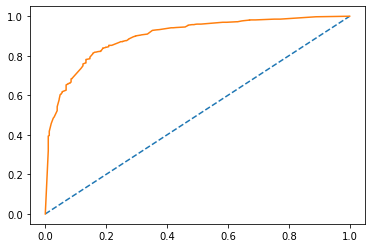

In [126]:
#AUC and ROC for the training data

# predict probabilities
probs = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [127]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8377192982456141
[[104  49]
 [ 25 278]]
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       153
           1       0.85      0.92      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.83       456



AUC: 0.899


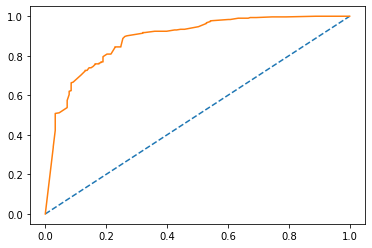

In [128]:
#AUC and ROC for the test data

# predict probabilities
probs = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Bagging - Random Forest

In [138]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
cart = RandomForestClassifier(n_estimators=100,random_state=1)
Bagging_model=BaggingClassifier(base_estimator=cart,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=100,
                                                        n_jobs=None,
       

In [139]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9632422243166824
[[275  32]
 [  7 747]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.93       307
           1       0.96      0.99      0.97       754

    accuracy                           0.96      1061
   macro avg       0.97      0.94      0.95      1061
weighted avg       0.96      0.96      0.96      1061



# AUC and ROC for the training data

AUC: 0.996


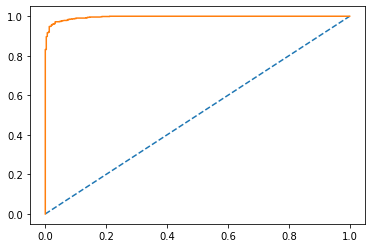

In [140]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [141]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[100  53]
 [ 26 277]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.82      0.83      0.82       456



# AUC and ROC for the test data

AUC: 0.996


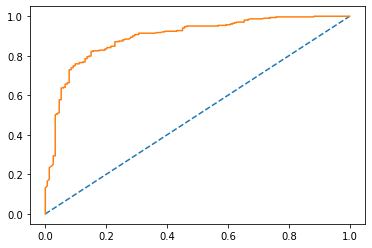

In [142]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<b>Tuned Model 

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100]
}
cart = RandomForestClassifier(random_state=1)
model=GridSearchCV(estimator=cart,param_grid = param_grid,cv=10)

Bagging_model=BaggingClassifier(base_estimator=model)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=GridSearchCV(cv=10,
                                              error_score='raise-deprecating',
                                              estimator=RandomForestClassifier(bootstrap=True,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features='auto',
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                         

In [156]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9754948162111216
[[282  25]
 [  1 753]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       307
           1       0.97      1.00      0.98       754

    accuracy                           0.98      1061
   macro avg       0.98      0.96      0.97      1061
weighted avg       0.98      0.98      0.98      1061



AUC: 0.998


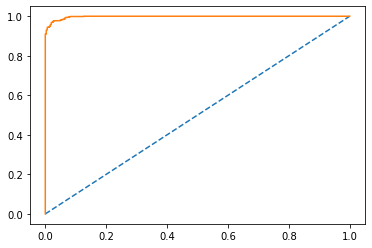

In [157]:
#AUC and ROC for the training data
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [158]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8201754385964912
[[ 97  56]
 [ 26 277]]
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       153
           1       0.83      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.77      0.79       456
weighted avg       0.82      0.82      0.81       456



AUC: 0.998


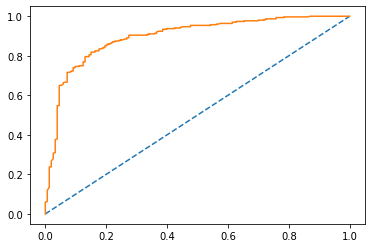

In [160]:
#AUC and ROC for the test data

# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Compare the models and write inference which model is best/optimized.

# Based on these predictions, what are the insights?

# Problem 2:
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1.	President Franklin D. Roosevelt in 1941

2.	President John F. Kennedy in 1961

3.	President Richard Nixon in 1973

•	Find the number of characters, words and sentences for the mentioned documents. – 3 Marks

•	Remove all the stopwords from all the three speeches. – 3 Marks

•	Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks

•	Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]

Code Snippet to extract the three speeches:
"
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
"


In [180]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS #calling WordCloud and Stopwords
from nltk.corpus import stopwords  #stopwords
from nltk.tokenize import word_tokenize #word tokenizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline

In [181]:
import nltk
#nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
features_roosevelt=inaugural.raw('1941-Roosevelt.txt')
features_kennedy=inaugural.raw('1961-Kennedy.txt')
features_nixon=inaugural.raw('1973-Nixon.txt')

In [182]:
features_roosevelt

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [183]:
features_kennedy

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [184]:
features_nixon

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

# Find the number of characters, words and sentences for the mentioned documents

# President Franklin D. Roosevelt - features_roosevelt

In [185]:
len(features_roosevelt)

7571

<b>Assigning Speech dataframe</b>

In [186]:
y_RV = pd.DataFrame({'Text': features_roosevelt}, index = [0])

In [187]:
y_RV

,Text
0,On each national day of inauguration since 178...


<b> Number of Characters</b>

In [188]:
y_RV['character_count']=y_RV['Text'].str.len()
y_RV

,Text,character_count
0,On each national day of inauguration since 178...,7571


<b> Number of Words</b>

In [189]:
y_RV['word_count']=y_RV['Text'].str.split().str.len()
y_RV

,Text,character_count,word_count
0,On each national day of inauguration since 178...,7571,1360


<b> Number of Sentences</b>

In [190]:
y_RV['sentence_count']=y_RV['Text'].str.split('.').str.len()
y_RV

,Text,character_count,word_count,sentence_count
0,On each national day of inauguration since 178...,7571,1360,69


<b> Number of stop Words</b>

In [191]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

y_RV['stopwords'] = y_RV['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
y_RV

,Text,character_count,word_count,sentence_count,stopwords
0,On each national day of inauguration since 178...,7571,1360,69,632


<b> Number of Numericals</b>

In [192]:
y_RV['numerics'] = y_RV['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
y_RV

,Text,character_count,word_count,sentence_count,stopwords,numerics
0,On each national day of inauguration since 178...,7571,1360,69,632,2


<b> Number of Upper Cases</b>

In [193]:
y_RV['upper'] = y_RV['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
y_RV

,Text,character_count,word_count,sentence_count,stopwords,numerics,upper
0,On each national day of inauguration since 178...,7571,1360,69,632,2,3


# KENNEDY - features_kennedy

In [194]:
len(features_kennedy)

7618

<b> Assigning Speech dataframe</b>

In [195]:
y_KE = pd.DataFrame({'Text':features_kennedy}, index = [0])
y_KE

,Text
0,"Vice President Johnson, Mr. Speaker, Mr. Chief..."


<b> Number of Characters</b>

In [196]:
y_KE['character_count']=y_KE['Text'].str.len()
y_KE

,Text,character_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618


<b>Number of Words</b>

In [197]:
y_KE['word_count']=y_KE['Text'].str.split().str.len()
y_KE

,Text,character_count,word_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1390


<b> Number of Sentences </b>

In [198]:
y_KE['sentence_count']=y_KE['Text'].str.split('.').str.len()
y_KE

,Text,character_count,word_count,sentence_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1390,56


<b> Number of stop Words</b>

In [199]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
y_KE['stopwords'] = y_KE['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
y_KE

,Text,character_count,word_count,sentence_count,stopwords
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1390,56,618


<b> Number of Numericals

In [200]:
y_KE['numerics'] = y_KE['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
y_KE

,Text,character_count,word_count,sentence_count,stopwords,numerics
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1390,56,618,1


<b> Number of Upper Cases

In [201]:
y_KE['upper'] = y_KE['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
y_KE

,Text,character_count,word_count,sentence_count,stopwords,numerics,upper
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1390,56,618,1,5


# NIXON - features_nixon

In [202]:
len(features_nixon)

9991

<b> Assigning Speech dataframe

In [203]:
y_NI = pd.DataFrame({'Text':features_nixon}, index = [0])
y_NI

,Text
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


<b> Number of Characters

In [204]:
y_NI['character_count']=y_NI['Text'].str.len()
y_NI

,Text,character_count
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


<b> Number of Words

In [205]:
y_NI['word_count']=y_NI['Text'].str.split().str.len()
y_NI

,Text,character_count,word_count
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1819


<b> Number of Sentences

In [206]:
y_NI['sentence_count']=y_NI['Text'].str.split('.').str.len()
y_NI

,Text,character_count,word_count,sentence_count
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1819,70


<b> Number of stop Words

In [207]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
y_NI['stopwords'] = y_NI['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
y_NI

,Text,character_count,word_count,sentence_count,stopwords
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1819,70,899


<b> Number of Numericals

In [208]:
y_NI['numerics'] = y_NI['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
y_NI

,Text,character_count,word_count,sentence_count,stopwords,numerics
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1819,70,899,1


<b>Number of Upper Cases

In [209]:
y_NI['upper'] = y_NI['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
y_NI

,Text,character_count,word_count,sentence_count,stopwords,numerics,upper
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1819,70,899,1,14


# Remove all the stopwords from all the three speeches. 

# Basic Pre-Processing - Roosevelt

<b>Lower Case conversion</b>

In [210]:
y_RV['Text'] = y_RV['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

<b>Removal of Punctuation</b>

In [211]:
y_RV['Text'] = y_RV['Text'].str.replace('[^\w\s]','')

<b> Removal of StopWords</b>

In [212]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
y_RV['Text'] = y_RV['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
y_RV['Text']

0    national day inauguration since 1789 people re...
Name: Text, dtype: object

# Basic Pre-Processing - Kennedy

<b>Lower Case conversion

In [213]:
y_KE['Text'] = y_KE['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

<b>Removal of Punctuation

In [214]:
y_KE['Text'] = y_KE['Text'].str.replace('[^\w\s]','')

<b>Removal of StopWords

In [215]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
y_KE['Text'] = y_KE['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
y_KE['Text']

0    vice president johnson mr speaker mr chief jus...
Name: Text, dtype: object

# Basic Pre-Processing - Nixon 

<b>Lower Case conversion

In [216]:
y_NI['Text'] = y_NI['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

<b>Removal of Punctuation
    

In [217]:
y_NI['Text'] = y_NI['Text'].str.replace('[^\w\s]','')

<b>Removal of StopWords

In [218]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
y_NI['Text'] = y_NI['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
y_NI['Text']

0    mr vice president mr speaker mr chief justice ...
Name: Text, dtype: object

# 	Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

<b>Franklin D. Roosevelt 

In [219]:
freq = pd.Series(' '.join(y_RV['Text']).split()).value_counts()[:10]
freq

nation       11
know         10
spirit        9
democracy     9
life          8
us            8
america       7
people        7
freedom       6
years         6
dtype: int64

<b>John F. Kennedy 

In [220]:
freq = pd.Series(' '.join(y_KE['Text']).split()).value_counts()[:10]
freq

let         16
us          12
sides        8
world        8
pledge       7
new          7
citizens     5
shall        5
nations      5
free         5
dtype: int64

<b>Richard Nixon 

In [221]:
freq = pd.Series(' '.join(y_NI['Text']).split()).value_counts()[:10]
freq

us                26
let               22
peace             19
world             16
new               15
america           13
responsibility    11
government        10
home               9
great              9
dtype: int64

# Plot the word cloud of each of the speeches of the variable. (after removing the stopwords

# WordCloud for President Franklin D. Roosevelt in 1941 Speech

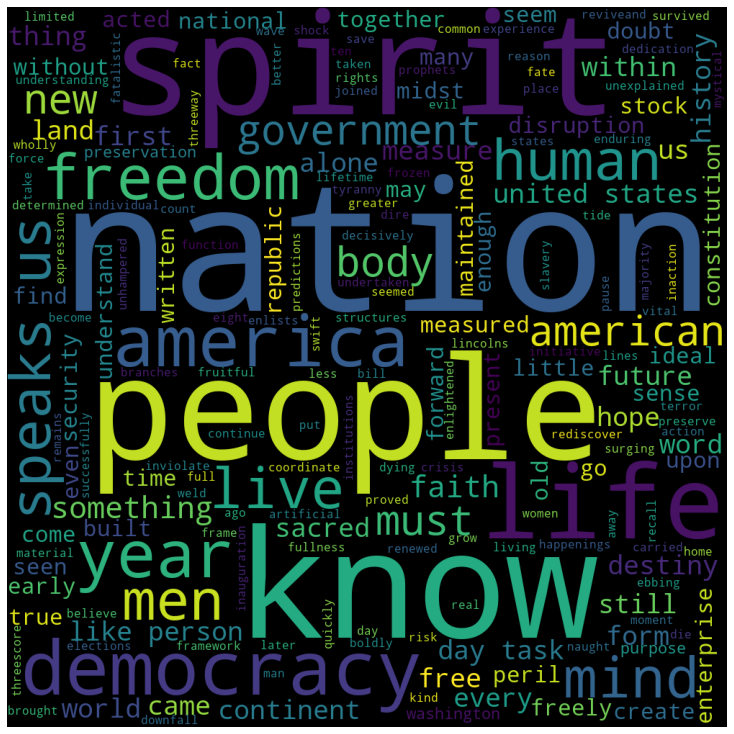

In [222]:
processed_features=y_RV['Text']
stop_words = set(stopwords.words('english'))  #intialise stopwords from English Language

filtered_sentence = [] #empty list
for i in processed_features: # iterating in processes features through each sentence
    word_tokens = word_tokenize(i) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stop_words:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list

comment_words = ' ' #empty string
stop_words = set(STOPWORDS) #stopwords from Wordcloud

for words in filtered_sentence:
    comment_words = comment_words + words + ' ' #converting to string

wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# WordCloud for President John F. Kennedy in 1961 Speech

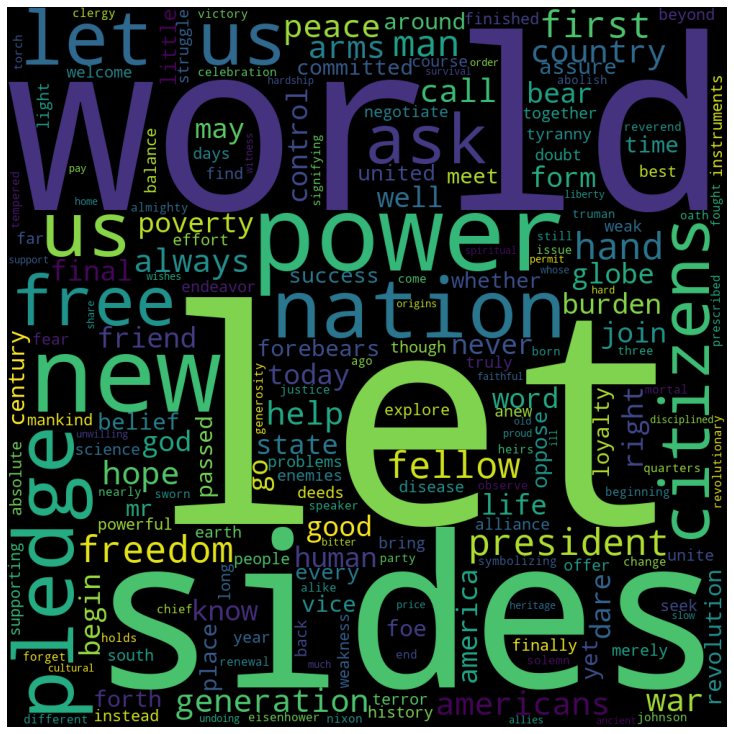

In [223]:
processed_features=y_KE['Text']
stop_words = set(stopwords.words('english'))  #intialise stopwords from English Language

filtered_sentence = [] #empty list
for i in processed_features: # iterating in processes features through each sentence
    word_tokens = word_tokenize(i) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stop_words:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list

comment_words = ' ' #empty string
stop_words = set(STOPWORDS) #stopwords from Wordcloud

for words in filtered_sentence:
    comment_words = comment_words + words + ' ' #converting to string

wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# WordCloud for President Richard Nixon in 1973 Speech

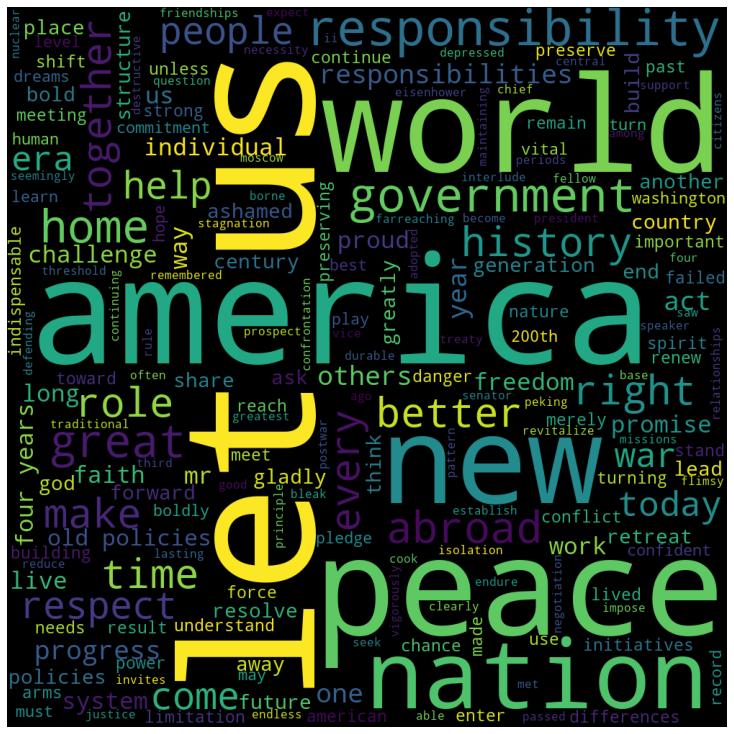

In [224]:
processed_features=y_NI['Text']
stop_words = set(stopwords.words('english'))  #intialise stopwords from English Language

filtered_sentence = [] #empty list
for i in processed_features: # iterating in processes features through each sentence
    word_tokens = word_tokenize(i) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stop_words:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list

comment_words = ' ' #empty string
stop_words = set(STOPWORDS) #stopwords from Wordcloud

for words in filtered_sentence:
    comment_words = comment_words + words + ' ' #converting to string

wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()